# Lab 2: PyTorch Basics

In [2]:
import torch
import numpy as np

## Part 1: Tensors

Tensors operate much like numpy arrays, but have additional properties which allow them to be used more easily in machine learning, such as being compatible with GPUs and other hardware accelerators and being optimized for automatic differentiation.

### Tensor Attributes

**Shape**: A tuple (n1, n2, ... nd) indicating the dimesions of the Tensor. To refer to a particular dimension, use `dim`, (instead of `axis` for `np.array`).


**Datatype**: Form of the data stored in the Tensor. Common datatypes include `torch.float`, `torch.long`, `torch.bool`. See https://pytorch.org/docs/stable/tensors.html for full list.

**Device**: Default device is `torch.device('cpu')`. If you want to use your GPU, be sure that your PyTorch installation has CUDA compatibility. If you have a GPU available, you can set the device to `torch.device('cuda')`

*Note*: If you have more than 1 GPU available, you can choose which gpu you would like to use by providing a device index. For example, `torch.device('cuda:0')` or `torch.device('cuda', index= 0)`

In [3]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Initialization

Like numpy arrays, Tensors can be initialized directly from data (in the form of a list or numpy array), or from random or constant values.

Tensors can also be converted into numpy arrays using `numpy()`. To do this, the Tensor must have its device set to `cpu`, or it will cause an error. You can easily move a Tensor to the cpu using `cpu()`. Similarly, you can move a Tensor to the GPU using `cuda()`.

In [4]:
#From data
data = [[1, 2], [3,4]]
x_data = torch.tensor(data)

#From Numpy Array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#From anaother tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

x_np = x_rand.cpu().numpy() #Move tensor to the cpu and then convert to numpy array

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1519, 0.4310],
        [0.9273, 0.1919]]) 



In [5]:
#Random and constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5990, 0.6066, 0.4638],
        [0.7794, 0.4559, 0.3315]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Operations

Many of the artihmetic operations for Tensors are equivalent to those for numpy arrays, such as:
<ul>
<li>Indexing</li>
<li>Slicing</li>
<li>Matrix Multiplication (`@` or `tensor.matmul` )</li>
<li>Elementwise Multiplication (`*` or `tensor.mul`)</li>
<li>Addition and Subtraction</li>
</ul>

To concatenate two Tensors, the you use `torch.cat`, which is similar to `np.concatenate`.

In [6]:
tensor = torch.ones(4, 4)
#Matrix Multiplication
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

#Elementwise Multiplication
z1 = tensor * tensor
z2 = tensor.mul(tensor)

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


Single-element items can be converted to a Python numerical value using `item()`

In [7]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


## Part 2: Neural Net Models

In [8]:
from torch import nn

### Defining a Model

The base class for any model in PyTorch is `nn.Module`. Every model that you building should have a `forward` function, which defines how your model processes input data.

In [9]:
class ExModel(nn.Module):
  '''
  Example model: A simple, two-layer NN with ReLU activation. 
  Input dimension is 100, output dimension is 1.
  '''
  def __init__(self):
    super(ExModel, self).__init__()
    self.layer1 = nn.Linear(100, 50)
    self.act1 = nn.ReLU()
    self.output_layer = nn.Linear(50, 1)

  def forward(self, x):
    x = self.layer1(x)
    x = self.act1(x)
    output= self.output_layer(x)
    return output


model = ExModel()
print(model)

ExModel(
  (layer1): Linear(in_features=100, out_features=50, bias=True)
  (act1): ReLU()
  (output_layer): Linear(in_features=50, out_features=1, bias=True)
)


To process `input` using your model, simply call `model(input)`. Do not call `model.forward()` directly!

In [10]:
batch_size = 64
input = torch.rand(batch_size, 100)
predictions = model(input)
print(predictions.shape)

torch.Size([64, 1])


### Graph-based computation: Parameters, Autograd, and Optimization

In [11]:
#Define hyperparameters for your training before initializing the optimizer
learning_rate = 1e-1
batch_size = 64
epochs = 5

**Loss Function**

We start by defining a loss function. For Regression, the most common loss function is `nn.MSELoss` (Mean Square Error). For classification, the most common losses are `nn.NLLLoss` (Negative Log Likelihood) or `nn.CrossEntropy` (which combines `nn.LogSoftmax` and `nn/NLLLoss`).

In [12]:
#Initialize the loss Function
loss_fn = nn.MSELoss()

**Optimizer**

Choose the optimizer you wish to use from those found in `torch.optim`. Commonly used optimizers include `SGD` and `Adam`. You can find the full list at https://pytorch.org/docs/stable/optim.html.

When you define the optimizer, you must give the parameters the optimizer is optimizing. If all your parameters are contained in your model class, you can access them using `model.parameters()`.

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Training Steps**

For each iteration in the training loop, optimization occurs in three steps:
- Call `optimizer.zero_grad()` to reset the gradients of the model parameters. By default, the gradients accumulate, so this ensures that the optimizer is not double-counting </li>
-Backpropagate the prediction loss with a call to `loss.backward()`. This causes PyTorch to deposit the gradients of the loss with respect to each parameter. </li>
- Call `optimizer.step()` to update the parameters according to the optimization scheme and gradients calculated in the backwards pass. </li>

In [14]:
#Randomly generate data and labels
data = torch.rand(batch_size, 100)
labels = torch.rand(batch_size, 1)
epochs = 10

#Training epochs
for epoch in range(epochs):
  optimizer.zero_grad()
  out = model(data)           #Generate predictions using the model
  loss = loss_fn(out, labels) #Loss/error
  print(f'Training Loss: {loss:.4f}')
  loss.backward()            #Propagate the gradients in backward pass
  optimizer.step()           #Update the weights


Training Loss: 0.2404
Training Loss: 0.1334
Training Loss: 0.0967
Training Loss: 0.0714
Training Loss: 0.0680
Training Loss: 0.0665
Training Loss: 0.0655
Training Loss: 0.0646
Training Loss: 0.0638
Training Loss: 0.0629


### Saving and Loading Models

The weights of a model are stored in a `state_dict`. You can train a model's state dictionary alone, or the entire model (including size and other hyperparameters). To load the weights of a model, use `model.load_statedict()`.

In [15]:
#Saving a model state_dict
model = ExModel()
torch.save(model.state_dict(), 'model_weights.pth')
model.load_state_dict(torch.load('model_weights.pth'))  #Load model weights


#Saving a full model
model = ExModel()
torch.save(model, 'model.pth')
model = torch.load('model.pth') #Load full model

During training, you can also save the state of your optimizer, which similarly has a state dictionary. This is especially important if you are using momentum-based optimizers (such as Adam).

In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
torch.save(optimizer.state_dict(), 'optimizer_state.pth')
optimizer.load_state_dict(torch.load('optimizer_state.pth'))

Often time, you might want to save many quantities at the same time when training a model. These can include:
- Model weights/state
- Optimizer weights/state
- Training loss
- Validation loss

One common way to say all of these at once is using a dictionary. You can access all relevant quantities at a point in training in a single checkpoint.

Note: You do not always need to save the model at each epoch. You may wish to define a `save_interval` to determine how often you save the weights.

In [17]:
#Randomly generate data and labels
data = torch.rand(batch_size, 100)
labels = torch.rand(batch_size, 1)
epochs = 10
train_losses = []

#Training epochs
for epoch in range(epochs):
  optimizer.zero_grad()
  out = model(data)           #Generate predictions using the model
  loss = loss_fn(out, labels) #Loss/error
  train_losses.append(loss)
  loss.backward()            #Propagate the gradients in backward pass
  optimizer.step()
  ckpt = {'train_losses': train_losses, 'model_weights': model.state_dict(),  # Define checkpoint
          'optimizer_state': optimizer.state_dict()}                          # dictionary
  torch.save(ckpt, f'trained_model_e{epoch}.ckpt')  #Save checkpoint for each epoch

## Example: Iris Classification

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

type(X_train.shape[1])

int

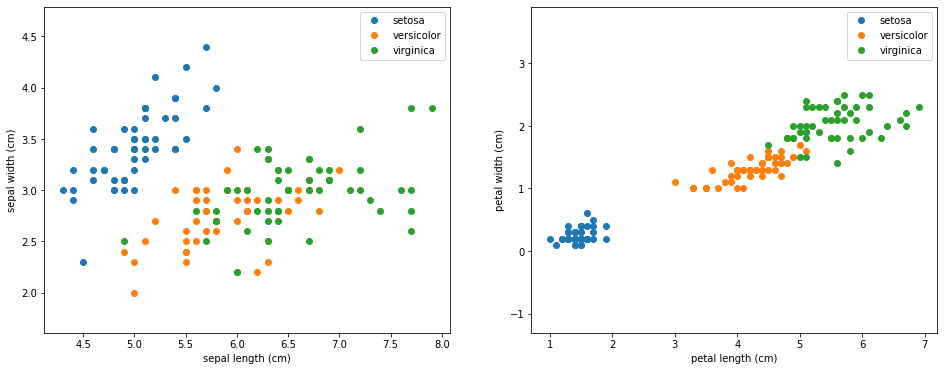

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

In [20]:
import torch.nn.functional as F
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [21]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [22]:
import tqdm

EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test  = torch.from_numpy(X_test).float()
y_test  = torch.from_numpy(y_test).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 1096.66it/s]


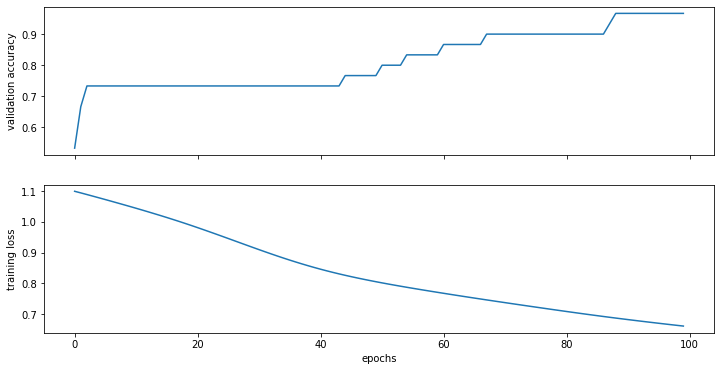

In [23]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("training loss")
ax2.set_xlabel("epochs");

## Lab Assignment: MNIST Classification Task

Design your own MNIST Classification model (see video recording for explanation of MNIST dataset). You may choose your own hyperparameters, including:
- Number of layers
- Number of neurons in each layer
- Learning rate
- Number of training epochs
- Optimizer

Using a fully-connected network, you should be able to accomplish >90% accuracy on the test set. Please report your hyperparameter selections and accuracy in a summary at the end of the notebook.

To load the MNIST dataset, we will use `torchvision`, which contains the datasets and has useful transformations. Start by defining the batch size you want for your training and test sets

In [29]:
import torchvision
from math import floor, ceil

train_batch_size = 64 #Define train batch size
test_batch_size  = 64 #Define test batch size (can be larger than train batch size)


# Use the following code to load and normalize the dataset
raw_train_set = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
# print([floor(len(raw_train_set)*0.8), floor(len(raw_train_set)*0.2)+1])
train_set, val_set = torch.utils.data.random_split(raw_train_set, [floor(len(raw_train_set)*0.8), floor(len(raw_train_set)*0.2)])

train_loader_new = torch.utils.data.DataLoader(train_set, batch_size=train_batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_set, batch_size=train_batch_size, shuffle=True)

# (input, targets)


# print(train_loader_new.shape())

# train_loader_data = []
# i = 0
# for data, target in train_loader_new:
#     train_loader_data[i] = data
#     i += 1

# X_train, y_train, X_val, y_val = torch.utils.data.random_split(train_loader, [floor(len(train_loader)*0.8), floor(len(train_loader)*0.2)+1])


test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=test_batch_size, shuffle=True)

train_loader_new

In [32]:
#Define your network:
class Network(nn.Module):
    def __init__(self, input_dim): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
        super(Network, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 10)
    
    def forward(self, input):
    #How does your model process the input?
        output = F.relu(self.layer1(input))
        output = F.relu(self.layer2(output))
        output = F.softmax(self.layer3(output), dim=1)
        return output

In [41]:
counter = 28*28
# for i, (train_sample, train_target) in enumerate(train_loader_new):
#     print(train_target.shape)
    
#Define your optimizer
model = Network(counter)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10

loss_list     = np.zeros((epochs,))
accuracy_list = np.zeros((epochs,))


for epoch in range(epochs):
    print(epoch)
    for i, (train_sample, train_target) in enumerate(train_loader_new):
        #Calculate training loss on model
        
        train_sample=train_sample.view(train_sample.size(0),28*28)
        y_pred = model(train_sample)
        loss = loss_fn(y_pred, train_target)  # ?
        loss_list[epoch] = loss.item()

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    for i, (val_sample, val_target) in enumerate(val_loader):
        val_sample=val_sample.view(val_sample.size(0),28*28)
        with torch.no_grad():
            y_pred = model(val_sample)
            correct = (torch.argmax(y_pred, dim=1) == val_target).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

#Calculate loss on test set
test_loss_list     = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

for epoch in range(epochs):
    for i, (test_sample, test_target) in enumerate(test_loader):
        test_sample=test_sample.view(test_sample.size(0),28*28)
        with torch.no_grad():
            y_pred = model(test_sample)
            correct = (torch.argmax(y_pred, dim=1) == test_target).type(torch.FloatTensor)
            test_accuracy_list[epoch] = correct.mean()
            
        #Calculate training loss on model
#         y_pred = model(X_train)
#         loss = loss_fn(y_pred, y_train)
#         loss_list[epoch] = loss.item()

        # Zero gradients
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
        

0
1
2
3
4
5
6
7
8
9


0.9375

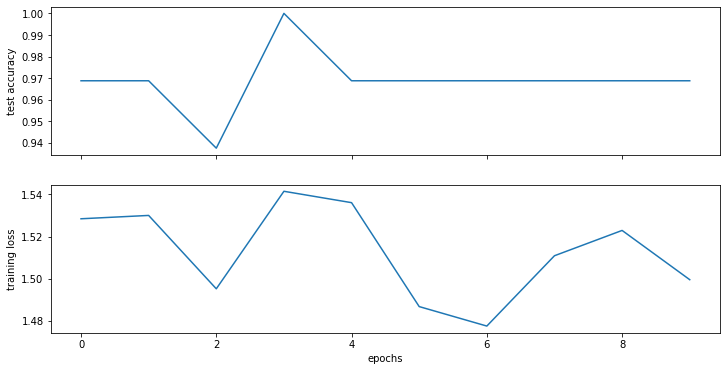

In [44]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("test accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("training loss")
ax2.set_xlabel("epochs");

# accuracy_list[49]
test_accuracy_list[0]

summary:
1. Number of layers: 3 layers.
2. Neurons in each layer: 50 neurons in each layer.
3. Activation function: Relu for layers 1 and 2, softmax for layer 3.
4. Learning Rate: 0.001.
5. Number of Training Epochs: 10.
The accuracy for my best-performing network is 93.75%.